<a href="https://colab.research.google.com/github/ArunPrasath1205/Retail-Sales-Prediction-ML-Project/blob/main/Part_1_Rossmann_Sales_Prediction_AP_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##Importing Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Importing Python Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##Creating File Path

In [139]:
sales_df = "/content/drive/MyDrive/Data Science/Module 04 ML/Retail sales prediction ML project/Rossmann Stores Data (1).csv"
store_df = "/content/drive/MyDrive/Data Science/Module 04 ML/Retail sales prediction ML project/store (1).csv"

##Reading CSV file

In [140]:
sales_df = pd.read_csv(sales_df)
store_df = pd.read_csv(store_df)

## Data Understanding

In [141]:
#Understanding the Rossmann store Dataset 1
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [142]:
sales_df["Store"].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

In [143]:
sales_df.shape


(1017209, 9)

In [144]:
sales_df["SchoolHoliday"].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [145]:
sales_df["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [146]:
sales_df["Store"].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

###Observation on sales_df:
* The above dataset "sales_df" provides the Historical sales of the rossmann store.
* It provides the Store ID and its corresponding sales on each day of particular years.
* It also provides some internal factors such as Promotion, store availability(open).
* Dataset provided with some external factors such as Stateholiday, schoolholiday which influences the sales of the store.
* It should be note that, **"school holiday"** columns gives detail about the stores affected by the closure of the Public schools.
* Values count shows that, Most of the stores are not affected by the factor still there are good numbers.

In [147]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


###Observation on store_df:
* This dataset provides us the supplement information about each stores.
* It provides information regarding the storetype and assortments that establised by the Rossmann company.
* It provides information about the competitors stores distance and their origin period.
* Store_df dataset provides us the elaborate information regarding the promotion of each stores.


## Checking for null values

In [148]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* Checking for the null values in the dataset information.
* In the sales dataset, we are fortunate enough to get the dataset with 0 null values in the features
* Total Rows = "1017209" and features ( columns ) = "9"

In [149]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


* In Store dataset, we provided with 1115 entires(rows) and 10 features 
* few features are come up with null value.
* Hence its important to process the null values in the dataset.

In [150]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [151]:
(round(store_df.isnull().sum()/(store_df.shape[0]),4)*100)

Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

* The Percentage of Null values in each feature in the sales dataset has been shown above.
* Feature CompetitionDistance with less than 1% null values
* It shows that features such as CompetitionOpenSinceMonth, CompetitionOpenSinceYear consists of around 30% null values.
* Promo2SinceYear, Promo2SinceWeek, PromoInterval are the features with the 50% of null values in respective entities.


Hence, we should deal with the null values by various methods before proceeding further.

## Dealing with Null values

### Treating Null values on feature "CompetitionDistance"

* As we already known that "CompetitionDistance" is the distance in meters to the nearest competitors.
* Hence distance of each store from the competitor will be seen using **"Distribution Plot"**

Text(0, 0.5, 'Distance from the Competitors')

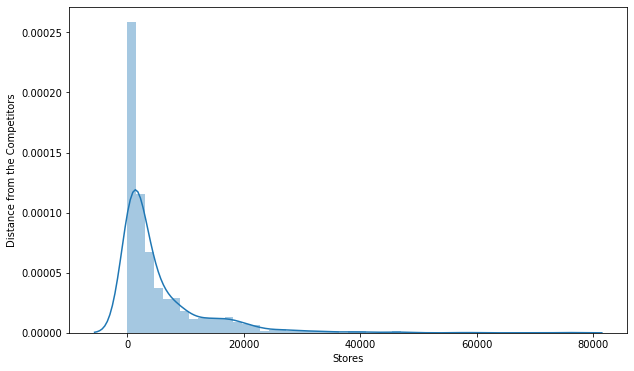

In [152]:
plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionDistance"])
plt.xlabel("Stores")
plt.ylabel("Distance from the Competitors")


* General Question raises here is, What measure of central tendency should we take?
* Since the Distribution has been positively skewed.
* There is posibility of the **outliers**
* Hence, it's better to choose **"Median"** to measure the central tendency of this feature.

In [153]:
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace = True)

In [154]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Treating the null values on features "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear"

In [155]:
store_df["CompetitionOpenSinceMonth"].value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

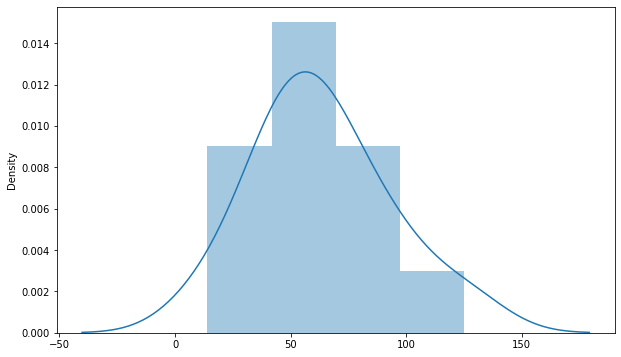

In [156]:
plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceMonth"].value_counts())

In [157]:
store_df["CompetitionOpenSinceYear"].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

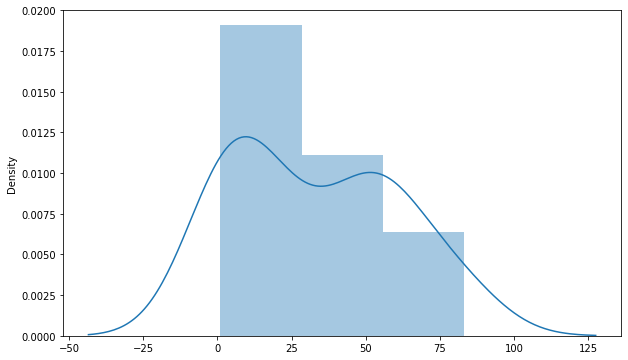

In [158]:
plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceYear"].value_counts())

* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Considering the Above two distribution, I choose to impute the null values by calcuating the **"Mean"** as the central tendency measure for both this features.
* Also we simply say, competition for the stores in general are peak for few and low for very few stores.
* Hence we dealing with the mean values for treating the null.

In [159]:
store_df["CompetitionOpenSinceMonth"].fillna(round(store_df["CompetitionOpenSinceMonth"].mean()), inplace =True)
store_df["CompetitionOpenSinceYear"].fillna(round(store_df["CompetitionOpenSinceYear"].mean()), inplace =True)

In [160]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Treating null values for Promotions

* For other three features, we just replacing the null values by "0"
* Assuming the if the Promotion since detail not given, then we considering there is no promotions in the store.

In [161]:
store_df["Promo2SinceWeek"].fillna(value = 0 , inplace = True)
store_df["Promo2SinceYear"].fillna(value = 0 , inplace = True)
store_df["PromoInterval"].fillna(value = 0 , inplace = True)

In [162]:
(round(store_df.isnull().sum()/(store_df.shape[0]),4)*100)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

* Hence, Both the dataset has been cleaned without null values in the entities of the features
* we shall now proceed for the merging of the two dataset

##Merging of Two Source Dataset

In [163]:
df = sales_df.merge(right = store_df, on= "Store", how = "left")  

In [164]:
df.shape

(1017209, 18)

In [165]:
df.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a


##Finding and Creating the categorical column list 

In [166]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

* I will be iterating through each column to find categorical features.


In [167]:
b = df["Sales"].value_counts()
len(b)

21734

In [168]:
categorical_features = []
for i in df.columns:
  a = df[i].value_counts()
  if len(a) < 600:
    categorical_features.append(i)
print(categorical_features)

['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


* Now, lets iterate through the each categorical feature.
* And finding the unique categorical values in the each features

In [169]:
list(df["DayOfWeek"].unique())

[5, 4, 3, 2, 1, 7, 6]

In [170]:
for col in categorical_features:
  values = df[col].unique()
  print(f"The Unique categorical values of the feature {col} is {values}")
  print("\n")

The Unique categorical values of the feature DayOfWeek is [5 4 3 2 1 7 6]


The Unique categorical values of the feature Open is [1 0]


The Unique categorical values of the feature Promo is [1 0]


The Unique categorical values of the feature StateHoliday is ['0' 'a' 'b' 'c' 0]


The Unique categorical values of the feature SchoolHoliday is [1 0]


The Unique categorical values of the feature StoreType is ['c' 'a' 'd' 'b']


The Unique categorical values of the feature Assortment is ['a' 'c' 'b']


The Unique categorical values of the feature CompetitionOpenSinceMonth is [ 9. 11. 12.  4. 10.  8.  7.  3.  6.  5.  1.  2.]


The Unique categorical values of the feature CompetitionOpenSinceYear is [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]


The Unique categorical values of the feature Promo2 is [0 1]


The Unique categorical values of the feature Promo2SinceWeek is [ 0. 13. 14.  1. 45. 40. 2

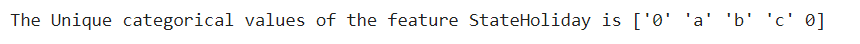

* It is noted that "0" provided as the string datatype
* It's nessasary to change it into integer datatype.

### Data Cleaning on Feature values

In [171]:
#Before changing
df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [172]:
df["StateHoliday"].replace({"0":0}, inplace = True)

In [173]:
# After Replacing the "0" with integer 0
df["StateHoliday"].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [174]:
df["Promo2SinceYear"].unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [175]:
df["Promo2SinceYear"].dtype

dtype('float64')

In [176]:
df.shape

(1017209, 18)

In [177]:
df["Promo2SinceYear"] = df["Promo2SinceYear"].astype(int)

In [178]:
df.shape

(1017209, 18)

In [179]:
df["Promo2SinceYear"].dtype

dtype('int64')

In [180]:
df["Promo2SinceYear"].unique()

array([   0, 2010, 2011, 2012, 2009, 2014, 2015, 2013])

### Creating the new columns by extracting the data from "Date"

In [181]:
df["Date"]

0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
              ...    
1017204    2013-01-01
1017205    2013-01-01
1017206    2013-01-01
1017207    2013-01-01
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

In [182]:
from datetime import datetime

In [183]:
df_dummy = df.copy()

In [184]:
df["Date"] = df["Date"].astype(np.datetime64)

In [185]:
df["Year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["dayofyear"] = df["Date"].dt.dayofyear
df["weekofyear"] = df["Date"].dt.weekofyear


In [186]:
df["Year"].value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

In [187]:
# Promotion since year has 0 as data value
# we know our dataset is provided only for 3 years till 2015
# hence we replacing the value 0 as 2015 in order to get the correct value when equating the years.

df["Promo2SinceYear"].replace({0:2015}, inplace = True)


In [188]:
df["Promo2SinceYear"].unique()

array([2015, 2010, 2011, 2012, 2009, 2014, 2013])

In [189]:
df.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a


##Percentage of sales against each categorical features

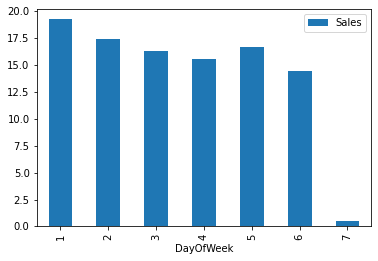

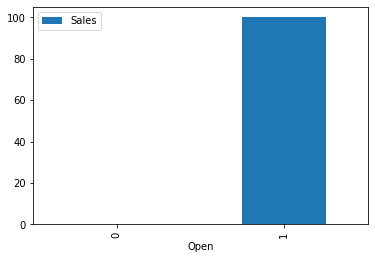

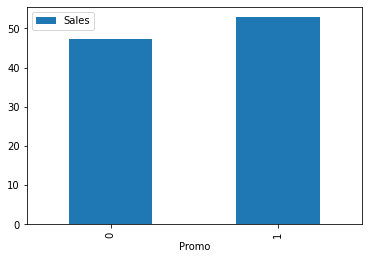

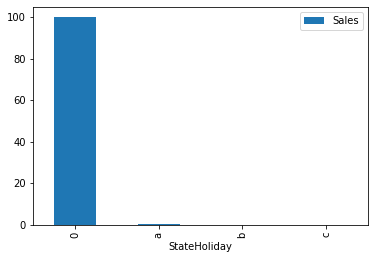

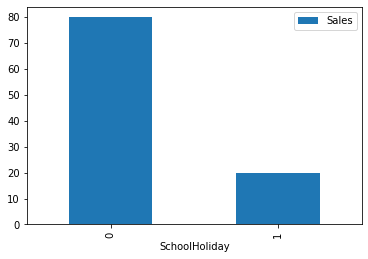

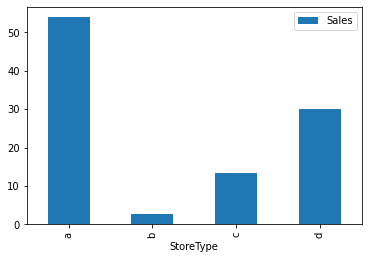

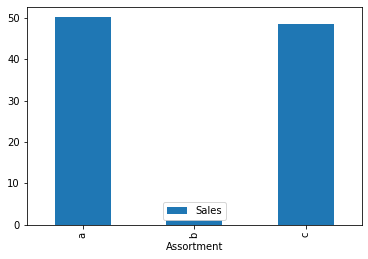

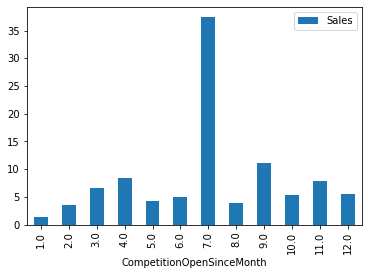

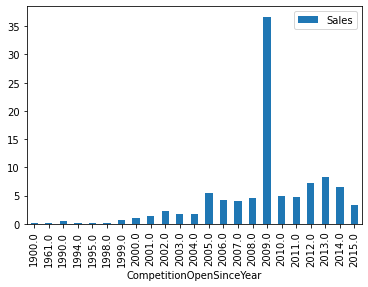

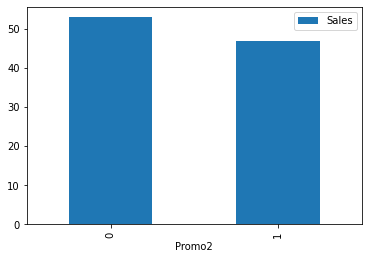

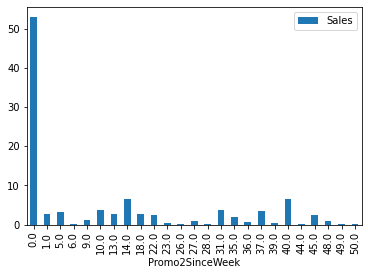

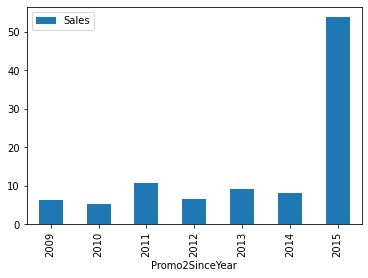

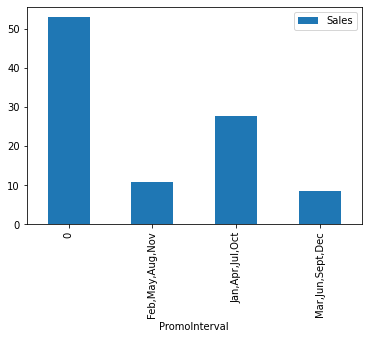

In [190]:
# Percentage of sales against each categorical features
for i in categorical_features:
  a = round(df["Sales"].groupby(df[i]).sum()/df["Sales"].sum() * 100, 2)
  b = pd.DataFrame(a)
  b.plot.bar()
plt.show()

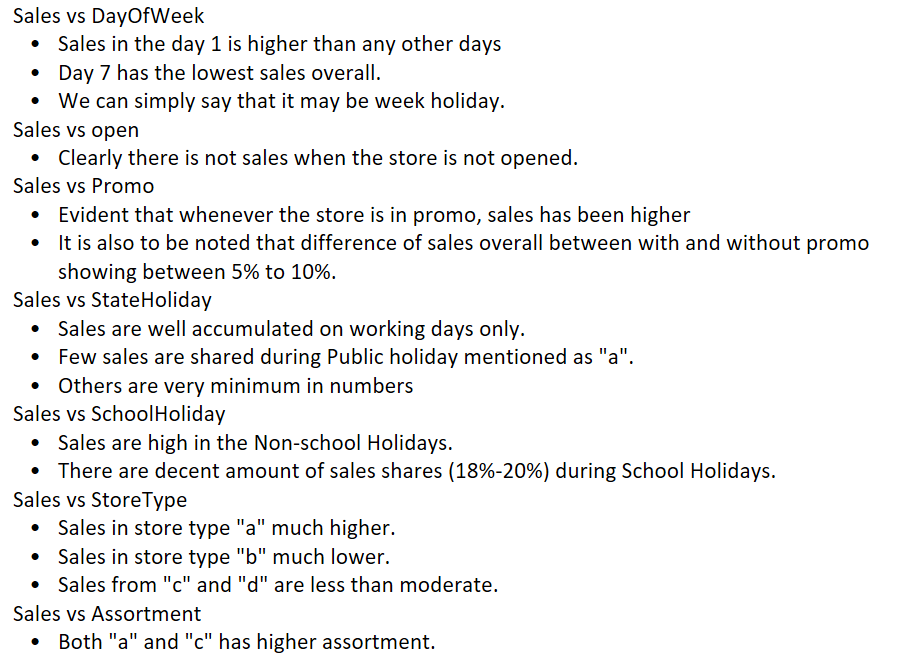

## Store operations on each day of week

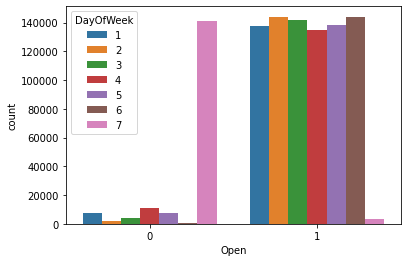

In [191]:
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

* Visualizing the operation and non-operation of the stores
* Taking the count of Days of week
* Observing that store are opened on everyday of week **except Day 7 (Sunday)**
* Comparing with other days, **Day 4 (Thursday)** has slightly higher non-opening days comparatively. 

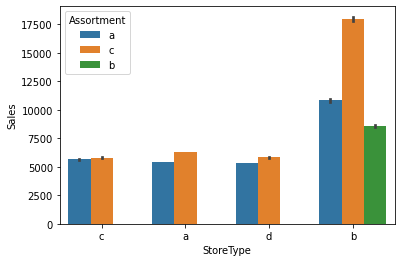

In [192]:
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

Observation:
* Here we taking 3 features into single account.
* Visualizing the sales of each store type (a, b, c, d)
* As well as we segregating the each store type (a, b, c, d) further with assortment type (a,b,c)
* Simply observed that, **Storetype b** has the highest sales than others in high margin.
* **Assortment c** from storetype b has highest sales overall.

## Analysing on Storetype vs customers vs sales

In [193]:
# Grouping the storetype with sales and customers
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
print(store_type)


  StoreType       Sales  Customers
0         a  3165334859  363541434
1         b   159231395   31465621
2         c   783221426   92129705
3         d  1765392943  156904995


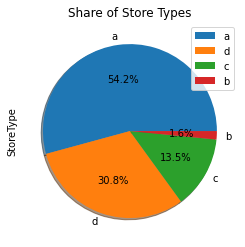

In [194]:
# Share of Each Store types on overall sales 

df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

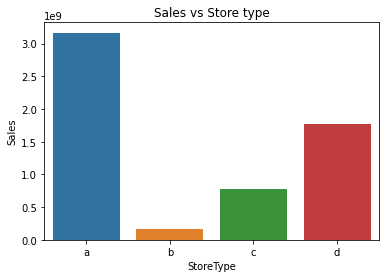

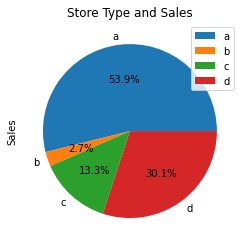

In [195]:
# Plotting for Sales vs Storetype

sns.barplot(x=store_type["StoreType"], y = store_type["Sales"])
plt.title("Sales vs Store type")
plt.show()

#Pie plotting and visulizing the percentage of sales against storetype

df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()

observation:
* **"Storetype a"** which has **highest** sales of 53.9%
* **"Storetype b"** which has **lowest** sales of 2.7% only.

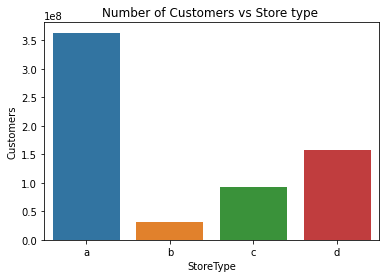

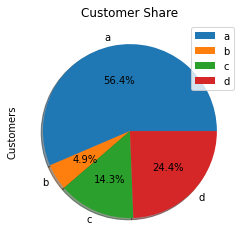

In [196]:
# Bar Plot on Storetype vs Number of Customers 
sns.barplot(x=store_type["StoreType"], y = store_type["Customers"])
plt.title("Number of Customers vs Store type ")
plt.show()

# Finding the Customer share percentage on each storetype.
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [197]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [198]:
df["Year"].value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

In [199]:
# Creating separate dataframe for each year
# To analyse on sales over each month on the particular year.

sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]
sales_2013 = sales_df_2013.groupby('month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('month')['Sales'].sum().reset_index()

In [200]:
sales_2013

,month,Sales
0,1,180132207
1,2,171534275
2,3,201180369
3,4,183431432
4,5,185411063
5,6,180702351
6,7,208843882
7,8,198042727
8,9,178053963
9,10,187662330


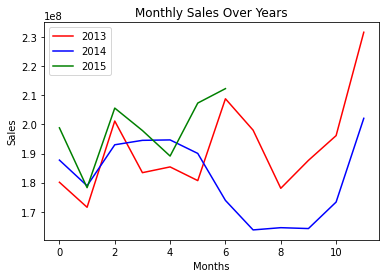

In [201]:
plt.plot(sales_2013.loc[:,"Sales"],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()

Observation:
* The Green lineplot provides the sales on 2015.
* Since our data provided till mid of 2015 it stopped in mid.
* Overall the **sales at the end of year was peak**.
* Sales on **month 2, 6** reaching **local maximum**.
* Overall sales was dipping on early month particularly in **January**. 

Text(0, 0.5, 'Mean Sale')

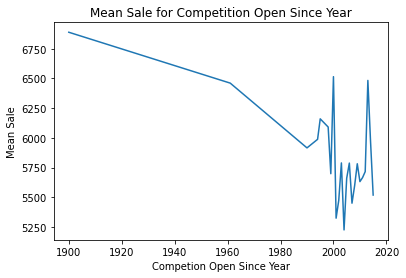

In [202]:
Mean_sale=df.groupby(['CompetitionOpenSinceYear'])['Sales'].mean()
plt.plot(Mean_sale)
plt.title('Mean Sale for Competition Open Since Year')
plt.xlabel('Competion Open Since Year')
plt.ylabel('Mean Sale')

Observation:
* Sales has been comparatively high when the competition open since year was old.
* It shows that, year by year when competitors increases store sales has been decreases.
* particularly between 2000 and 2020 sales has been affected in high numbers and increases to achieve peak around 2015-2018

## Finding and Treating Outliers

### Finding Outliers on sales using Boxplot

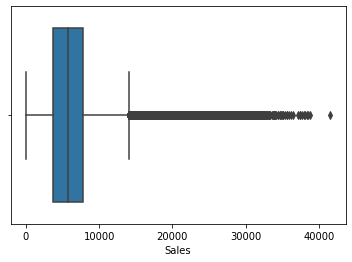

In [203]:
sns.boxplot(x=df['Sales'])

Observation:
* There are **very large outliers** in sales 
* Reason we can observe that it was because there is **very much difference in sales on state holidays and school holidays**.
* We **cannot remove** such large outliers which may lead to loss of valid informations.
* Hence we need to **treat the outliers** accordingly using normalization or standardization.

###Finding Outliers on sales using Distribution plot.

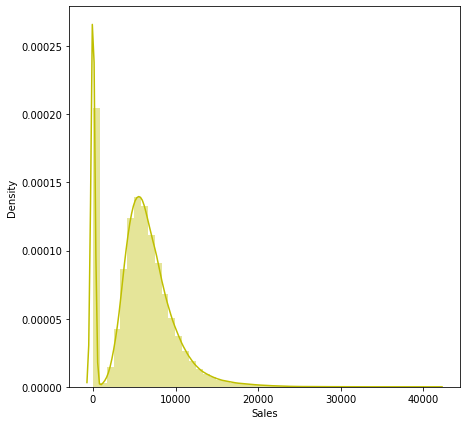

In [204]:
#dependent variable sale. Distribution of sale
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="y")

Observation:
* As we see two peak raised in distribution.
* First peak is solely due to **sales recorded "0"**
* After that sales distribution has been **normally distribution**


### Treating Sales feature
* As we previously saw the distribution of sales (Two Peaks).
* We now **dropping** those rows of data which has **zero sales** in order to normal the distribution.

In [205]:
# Dataset records before dropping the sales == 0
df.shape

(1017209, 22)

In [206]:
df.drop(df[(df['Sales'] ==0)].index, inplace=True)

In [207]:
# Dataset records after dropping the sales == 0
df.shape

(844338, 22)

###Transforming the sales feature
* Using SquareRoot
* Using Log Transformation 

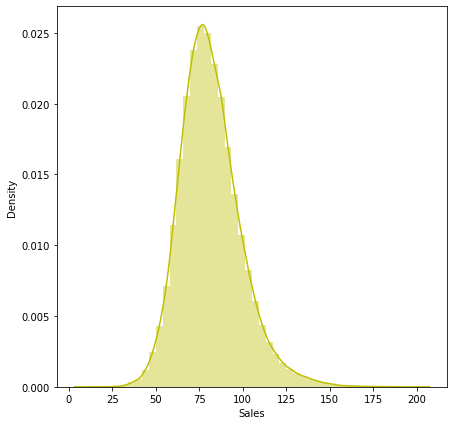

In [208]:
# Squareroot Transformation
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Sales']),color="y")

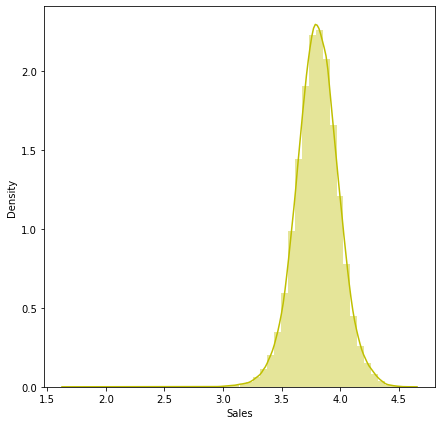

In [209]:
# Log Transforming
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Sales']),color="y") 

###Finding Outliers on Customers using Boxplot

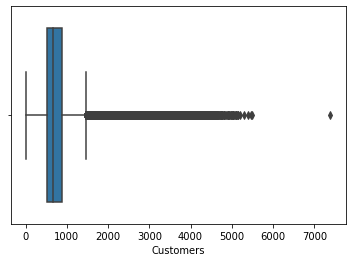

In [210]:
sns.boxplot(x=df['Customers'])

* The distribution of number of customers are very similar to sales because sales directly depends on number of customers.

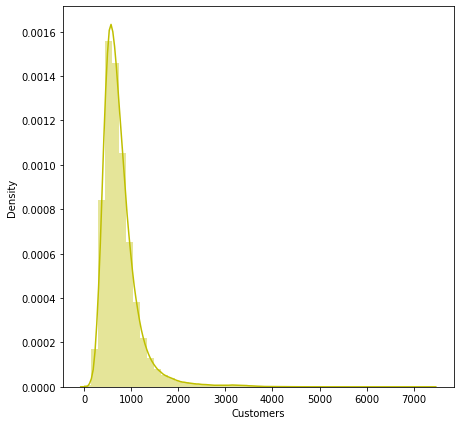

In [211]:
# Distribution of Customers after droppping the sales == 0

plt.figure(figsize=(7,7))
sns.distplot(df['Customers'],color="y")

### Transforming the Customers Feature

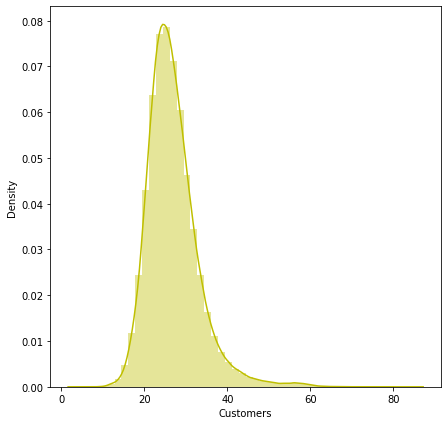

In [212]:
# Using Square root transformation


plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Customers']),color="y")

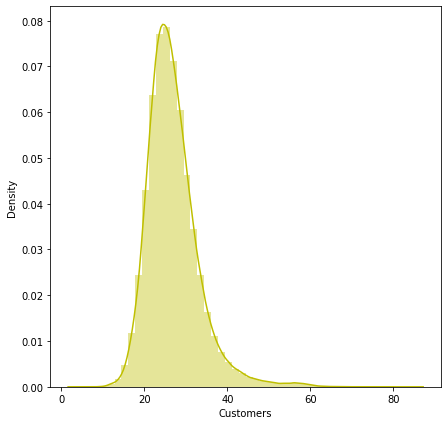

In [213]:
# Log Transformation on customers 
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Customers']),color="y")

## Sales during Holidays
* We Provided with two types of holiday
* Stateholiday and School Holiday

In [214]:
df.groupby(['StateHoliday','SchoolHoliday'])['Sales'].mean().unstack()

SchoolHoliday,0,1
StateHoliday,,
0,6895.578733,7197.425646
a,8492.066102,8461.403846
b,34781.166667,8813.359712
c,NaN,9743.746479


### Finding outliers on stateholiday

Text(0, 0.5, 'State Holiday')

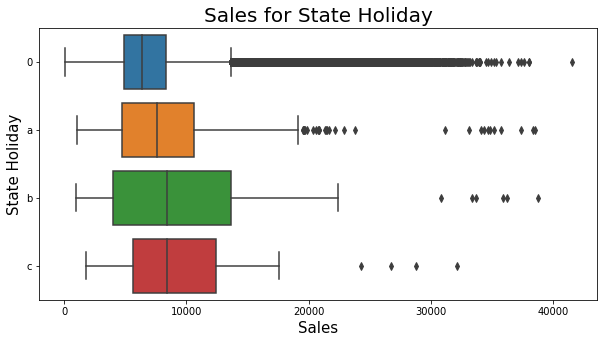

In [215]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Sales", y="StateHoliday", data=df, orient="h")
ax.set_title('Sales for State Holiday',fontsize = 20)
ax.set_xlabel("Sales", fontsize = 15)
ax.set_ylabel("State Holiday", fontsize = 15)

###Finding outliers on State Holidays

Text(0, 0.5, 'School Holiday')

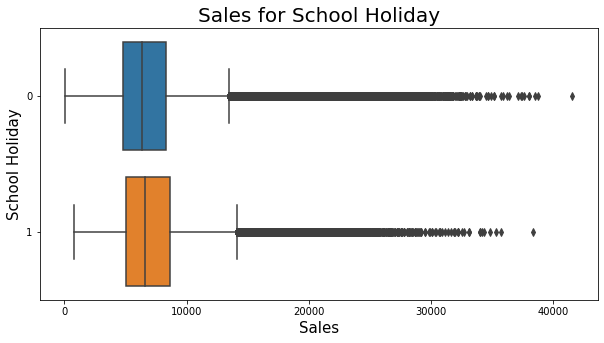

In [216]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Sales", y="SchoolHoliday", data=df, orient="h")
ax.set_title('Sales for School Holiday',fontsize = 20)
ax.set_xlabel("Sales", fontsize = 15)
ax.set_ylabel("School Holiday", fontsize = 15)

##Finding outliers on assortments

###Assortments according to sales and customers

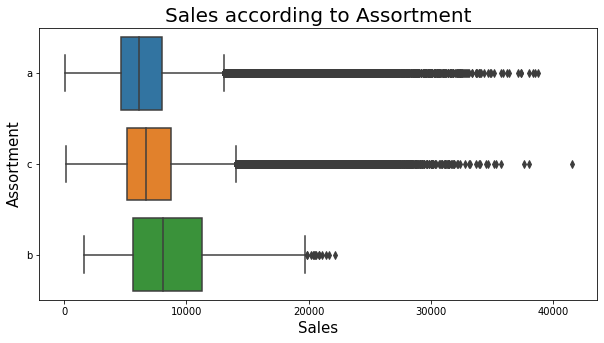

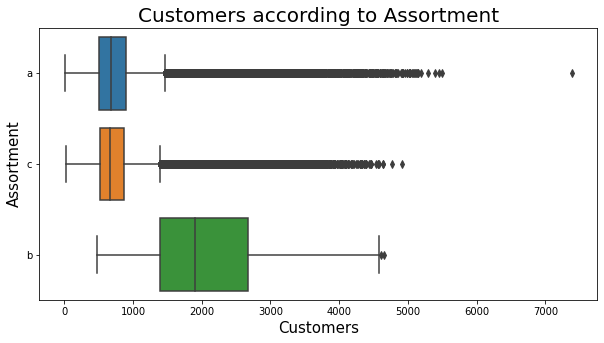

In [217]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Sales", y="Assortment", data=df, orient="h")
ax.set_title('Sales according to Assortment',fontsize = 20)
ax.set_xlabel("Sales", fontsize = 15)
ax.set_ylabel("Assortment", fontsize = 15)
plt.show()


plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Customers", y="Assortment", data=df, orient="h")
ax.set_title('Customers according to Assortment',fontsize = 20)
ax.set_xlabel("Customers", fontsize = 15)
ax.set_ylabel("Assortment", fontsize = 15)
plt.show()

##Correlation Matrix

* Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables 

* A perfect correlation can be either +1 or -1.
* i.e., for +1 it implies positive or direct relationship.
* for -1 it implies negative or indirect relationship.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        844338 non-null  float64

In [219]:
df.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,c,a,a,c,a


In [220]:
# Create a list of columns that don't need for correlation

unwanted_columns_to_corr = ["Store","Date","Year", "Open"]

# Droping "open" because it gives blank space in heatmap


In [221]:
correlation_df = df.drop(columns = unwanted_columns_to_corr, axis = 1)

In [222]:
# After Noting down that the correlation map was not created for the "state holiday"
# We converting the "string" records of the "state holiday" into integer.
# Replacing the state holiday types of "a"/"b"/"c" into 1 
# and keeping the 0 as it is.

correlation_df['StateHoliday'] = correlation_df['StateHoliday'].apply(lambda x:0 if x == 0 else 1)

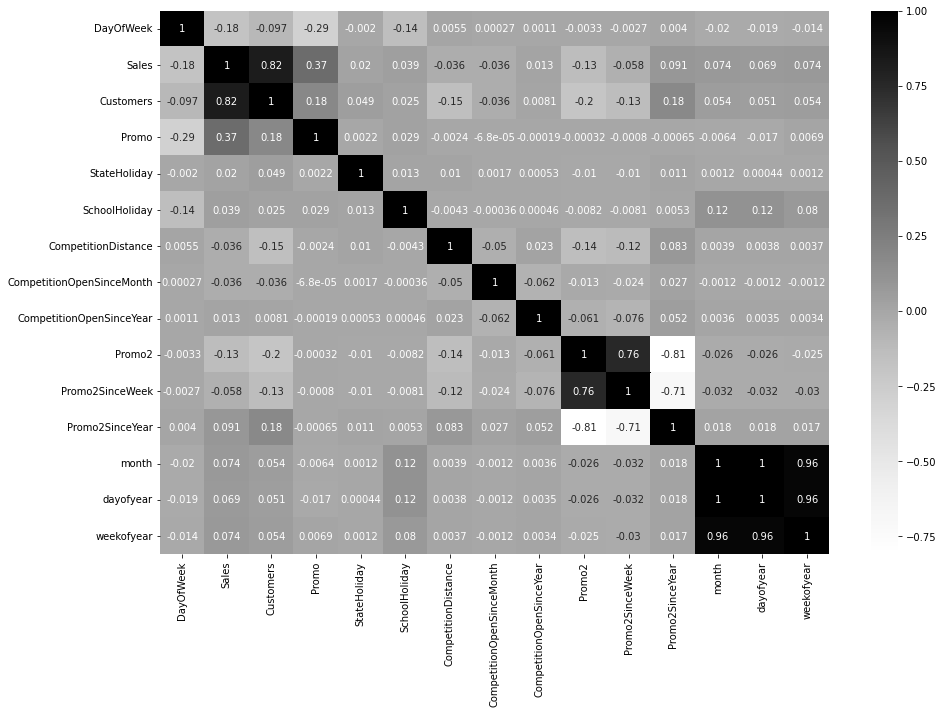

In [223]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_df.corr(), cmap="Greys", annot=True)

###Observations from correlation matrix:

$Day of the Week$
* Had Negative Relation with sales, customer, promo, school holiday.
* Had some positive relation with competition features as well as if the promo is continuing.

$sales$
* High positive correlation with the customers.
* Decent positive correlation with the Promo given by the company.
* Other features are very low correlation with the sales

$Customers$
* As discussed above for sales.
* Both sales and customers are similar relationship with other features.

$Promo$
* Decent amount of positive relationship with sales.
* As competition distance had negative correlation with the Promo, which seams Promotion of the store is reduced or not given if the competitor are placed at more distance from the store.

$School Holiday$ and $State Holiday$
* Literally school/state holiday not have that much effect on the relationship with the other features.

$Competition Distance$
* Had some negative relationship with sales and customers.

$Promotions$
* Both Promo2 and Promo2sinceweek has similar relationship with other features as well as Highly correlated.
* But "Promo2sinceyear" had some negative relationship with the other two promotion features.
* From which we can state that, if the promo2 or/and Promo2sinceweek has high in numbers, it directly impact negatively by reduced promo2sinceyear by the company.

$Month$, $Day of year$ and $Week of year$
* All these three are highly correlated with each other.


## Feature Engineering

In [224]:
(df[df.Open == 0]).shape

(0, 22)

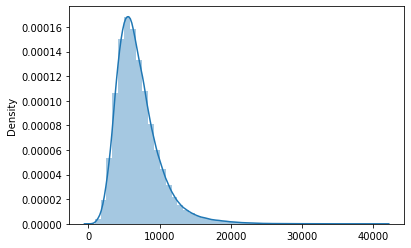

In [225]:
sns.distplot(x=df['Sales'])

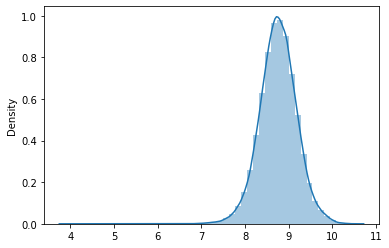

In [226]:
df['Sales'] = np.log(df['Sales'])
df.dropna(inplace=True)
sns.distplot(x=df['Sales'])

In [227]:
# We already known about the "State Holiday" and its record values
# we replacing the values as Boolean (0 or 1)

df['StateHoliday'] = df['StateHoliday'].apply(lambda x:0 if x == 0 else 1)

In [228]:
df["StateHoliday"].value_counts()

0    843428
1       910
Name: StateHoliday, dtype: int64

In [229]:
df["CompetitionOpenSinceYear"].value_counts()

2009.0    309311
2013.0     63106
2012.0     61716
2014.0     52807
2005.0     46703
2010.0     42715
2011.0     41363
2008.0     40195
2007.0     36125
2006.0     35543
2015.0     28844
2002.0     20736
2004.0     16333
2003.0     13832
2001.0     12157
2000.0      7631
1999.0      6213
1990.0      3885
1994.0      1552
1995.0      1404
1961.0       779
1998.0       766
1900.0       622
Name: CompetitionOpenSinceYear, dtype: int64

In [230]:
df["month"].value_counts()

1     86335
3     85975
7     85576
6     82571
4     81726
2     80239
5     80099
8     54411
10    53291
9     52321
11    51401
12    50393
Name: month, dtype: int64

In [231]:
# Combining the competition features
# We provided with competition since month and competition since year features
# we combining it as a single feature in number of months

df['CompetitionOpened'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['month'] - df['CompetitionOpenSinceMonth'])

In [232]:
df["CompetitionOpened"].describe()

count    844338.000000
mean         59.148958
std          59.821659
min         -31.000000
25%          29.000000
50%          55.000000
75%          73.000000
max        1386.000000
Name: CompetitionOpened, dtype: float64

In [233]:
# To deal with the Negative values in the periodical column

df['CompetitionOpened'] = df['CompetitionOpened'].apply(lambda x:0 if x < 0 else x)

In [234]:
#Now Dropping the features which used to combine "CompetitionOpened"

df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [235]:
# Similar to combining the Competition features, we now try to combine the Promotional features

df['Promo2Open'] = (df['Year'] - df['Promo2SinceYear'])*12 + (df['weekofyear'] - df['Promo2SinceWeek'])

In [236]:
df['Promo2Open'].describe()

count    844338.000000
mean         17.458744
std          22.750616
min         -60.000000
25%           2.000000
50%          17.000000
75%          31.000000
max          95.000000
Name: Promo2Open, dtype: float64

In [237]:
# Dealing with Negative values

df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df['Promo2']

In [238]:
df["PromoInterval"].value_counts()

0                   423292
Jan,Apr,Jul,Oct     242397
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

In [239]:
PromoInterval_list = []
for i in df["PromoInterval"]:
  if i == 0:
    PromoInterval_list.append(i)
  elif "Jan" in i.split(","):
    PromoInterval_list.append(1)
  elif "Feb" in i.split(","):
    PromoInterval_list.append(2)
  else:
    PromoInterval_list.append(3)



In [240]:
df["PromoInterval"][0:15]

0                   0
1     Jan,Apr,Jul,Oct
2     Jan,Apr,Jul,Oct
3                   0
4                   0
5                   0
6                   0
7                   0
8                   0
9                   0
10    Jan,Apr,Jul,Oct
11    Jan,Apr,Jul,Oct
12    Feb,May,Aug,Nov
13    Jan,Apr,Jul,Oct
14    Jan,Apr,Jul,Oct
Name: PromoInterval, dtype: object

In [241]:
PromoInterval_list[0:15]

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1]

In [242]:
df["PromoInterval"] = pd.Series(PromoInterval_list)

In [243]:
df["PromoInterval"].value_counts()

0.0    352593
1.0    202012
2.0     81630
3.0     67175
Name: PromoInterval, dtype: int64

In [244]:
# Dropping the features that used to create combined feature for Promotions

df.drop(['Promo2SinceYear','Promo2SinceWeek'],axis=1,inplace=True)

In [245]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1016588, 1016606, 1016624, 1016656, 1016770, 1016776, 1016827,
            1016863, 1017042, 1017190],
           dtype='int64', length=844338)

In [246]:
df.set_index(["Date","Store"], inplace = True)

In [247]:
df.index

MultiIndex([('2015-07-31',    1),
            ('2015-07-31',    2),
            ('2015-07-31',    3),
            ('2015-07-31',    4),
            ('2015-07-31',    5),
            ('2015-07-31',    6),
            ('2015-07-31',    7),
            ('2015-07-31',    8),
            ('2015-07-31',    9),
            ('2015-07-31',   10),
            ...
            ('2013-01-01',  494),
            ('2013-01-01',  512),
            ('2013-01-01',  530),
            ('2013-01-01',  562),
            ('2013-01-01',  676),
            ('2013-01-01',  682),
            ('2013-01-01',  733),
            ('2013-01-01',  769),
            ('2013-01-01',  948),
            ('2013-01-01', 1097)],
           names=['Date', 'Store'], length=844338)

In [248]:
df.sort_index(inplace = True)

In [249]:
df.head()

DayOfWeek     Sales  Customers  Open  Promo  StateHoliday  \
Date       Store                                                              
2013-01-01 85             2  8.347590        619     1      0             1   
           259            2  8.832150       1444     1      0             1   
           262            2  9.756552       2875     1      0             1   
           274            2  8.039802        729     1      0             1   
           335            2  7.783641        482     1      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  PromoInterval  Year  month  dayofyear  weekofyear  \
Date       Store                                                              
2013-01-01 85          0            NaN  2013      1          1           1   
           259         0            NaN  2013      1          1           1   
           262         0            NaN  2013      1          1           1   
           274         1            NaN  2013      1          1           1   
           335         1            NaN  2013      1          1           1   

                  CompetitionOpened  Promo2Open  
Date       Store                                 
2013-01-01 85                  15.0         0.0  
           259                 42.0         0.0  
           262                  0.0         0.0  
           274                 42.0         0.0  
           335                 42.0         0.0

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 844338 entries, (Timestamp('2013-01-01 00:00:00'), 85) to (Timestamp('2015-07-31 00:00:00'), 1115)
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844338 non-null  int64  
 1   Sales                844338 non-null  float64
 2   Customers            844338 non-null  int64  
 3   Open                 844338 non-null  int64  
 4   Promo                844338 non-null  int64  
 5   StateHoliday         844338 non-null  int64  
 6   SchoolHoliday        844338 non-null  int64  
 7   StoreType            844338 non-null  object 
 8   Assortment           844338 non-null  object 
 9   CompetitionDistance  844338 non-null  float64
 10  Promo2               844338 non-null  int64  
 11  PromoInterval        703410 non-null  float64
 12  Year                 844338 non-null  int64  
 13  month                844338 non-null  int64  
 1

In [251]:
df["PromoInterval"].fillna(value = 0 , inplace = True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 844338 entries, (Timestamp('2013-01-01 00:00:00'), 85) to (Timestamp('2015-07-31 00:00:00'), 1115)
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844338 non-null  int64  
 1   Sales                844338 non-null  float64
 2   Customers            844338 non-null  int64  
 3   Open                 844338 non-null  int64  
 4   Promo                844338 non-null  int64  
 5   StateHoliday         844338 non-null  int64  
 6   SchoolHoliday        844338 non-null  int64  
 7   StoreType            844338 non-null  object 
 8   Assortment           844338 non-null  object 
 9   CompetitionDistance  844338 non-null  float64
 10  Promo2               844338 non-null  int64  
 11  PromoInterval        844338 non-null  float64
 12  Year                 844338 non-null  int64  
 13  month                844338 non-null  int64  
 1

In [252]:
df.head()

DayOfWeek     Sales  Customers  Open  Promo  StateHoliday  \
Date       Store                                                              
2013-01-01 85             2  8.347590        619     1      0             1   
           259            2  8.832150       1444     1      0             1   
           262            2  9.756552       2875     1      0             1   
           274            2  8.039802        729     1      0             1   
           335            2  7.783641        482     1      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  PromoInterval  Year  month  dayofyear  weekofyear  \
Date       Store                                                              
2013-01-01 85          0            0.0  2013      1          1           1   
           259         0            0.0  2013      1          1           1   
           262         0            0.0  2013      1          1           1   
           274         1            0.0  2013      1          1           1   
           335         1            0.0  2013      1          1           1   

                  CompetitionOpened  Promo2Open  
Date       Store                                 
2013-01-01 85                  15.0         0.0  
           259                 42.0         0.0  
           262                  0.0         0.0  
           274                 42.0         0.0  
           335                 42.0         0.0

In [253]:
df_cleaned = df.to_csv("/content/drive/MyDrive/Data Science/Module 04 ML/Retail sales prediction ML project/df_cleaned.csv")

##Modeling

###Train-test split

In [254]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df.loc[start_test:end_test]

In [255]:
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 17)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 17)
The shape of y_test is: (45852, 1)


In [257]:
# Creating CSV
df_train_csv = df_train.to_csv("/content/drive/MyDrive/Data Science/Module 04 ML/Retail sales prediction ML project/df_train.csv")
df_test_csv = df_test.to_csv("/content/drive/MyDrive/Data Science/Module 04 ML/Retail sales prediction ML project/df_test.csv")

In [258]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [259]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

##Decision Tree

In [260]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [261]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [262]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']


In [263]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [264]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

The Mean Absolute Error for the validation set is 0.198112
The Mean Squared Error for the validation set is 0.074079
The Root Mean Squared Error for the validation set is 0.272174
The R^2 for the validation set is 0.921358
The Adjusted R^2 for the validation set is 0.92131


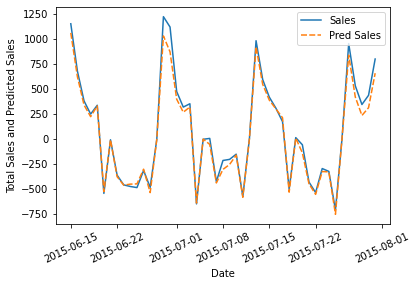

In [265]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [266]:
#add result to comparision_df
add_list_to_final_df(decision_tree)

In [267]:
comparison_df.head(1)

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.000001,0.0,0.000683,1.0,1.0,0.198112,0.074079,0.272174,0.921358,0.92131


In [269]:
dt_results = comparison_df.head(1).to_csv("/content/drive/MyDrive/Data Science/Module 04 ML/Retail sales prediction ML project/dt_results.csv")